In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

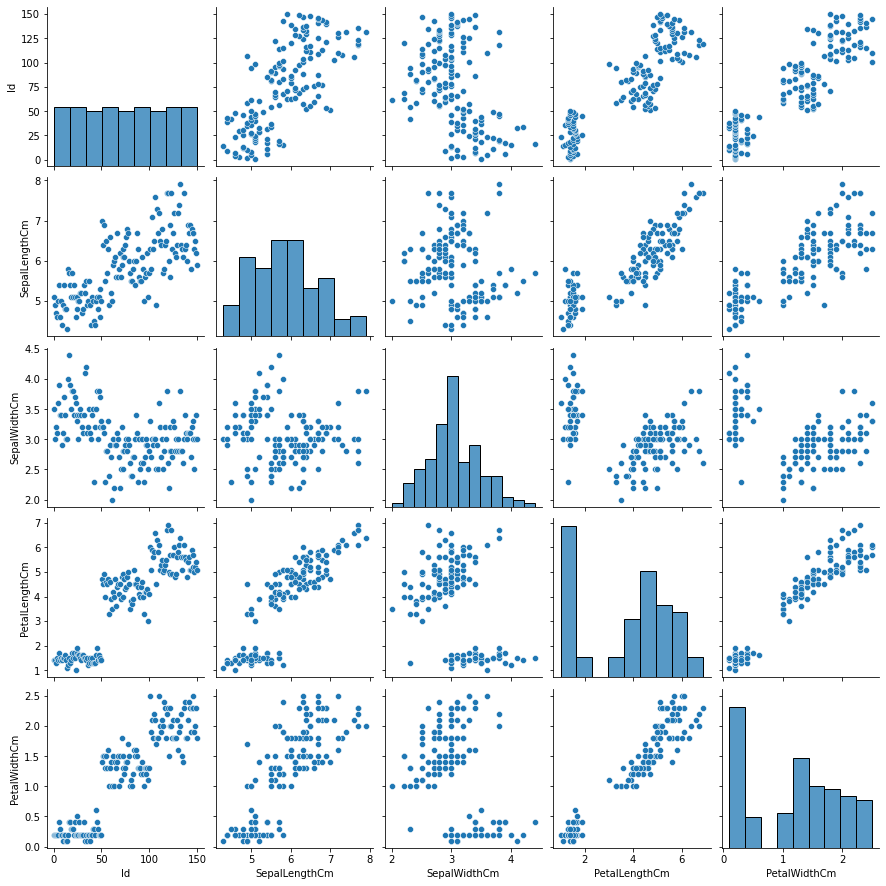

In [6]:
sns.pairplot(df)

<AxesSubplot:>

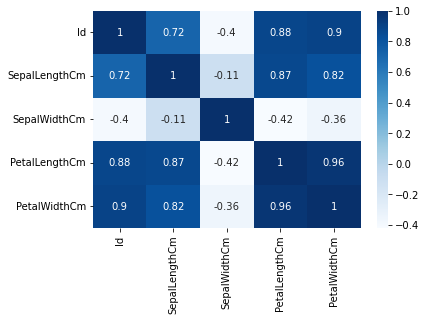

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [8]:
x = df["Species"].unique()
name = ["Types Of Species"]
species = pd.DataFrame(x,columns=name)

In [9]:
species

,Types Of Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


<AxesSubplot:xlabel='Species', ylabel='count'>

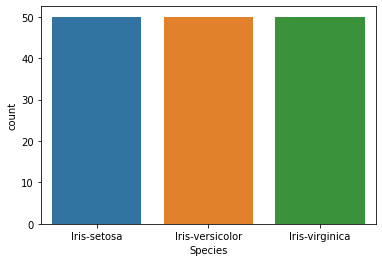

In [10]:
sns.countplot(data=df,x="Species")

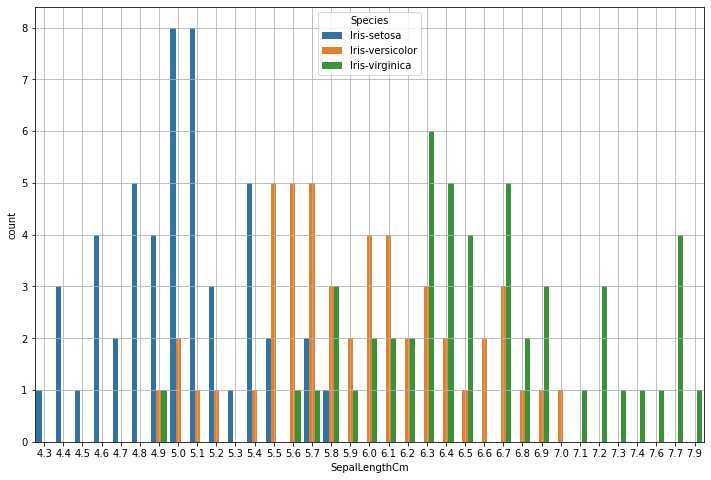

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="SepalLengthCm",hue="Species")
plt.grid(True)

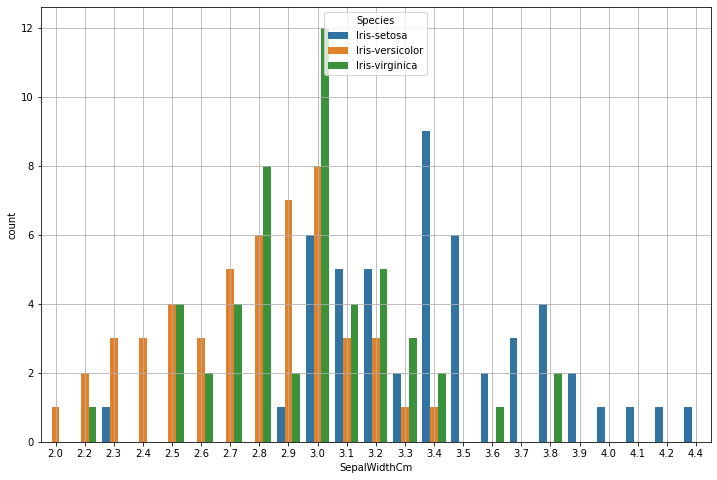

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="SepalWidthCm",hue="Species")
plt.grid(True)

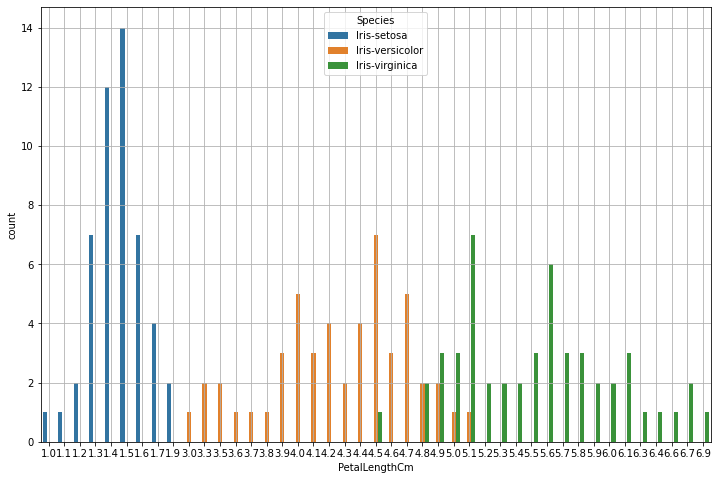

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="PetalLengthCm",hue="Species")
plt.grid(True)

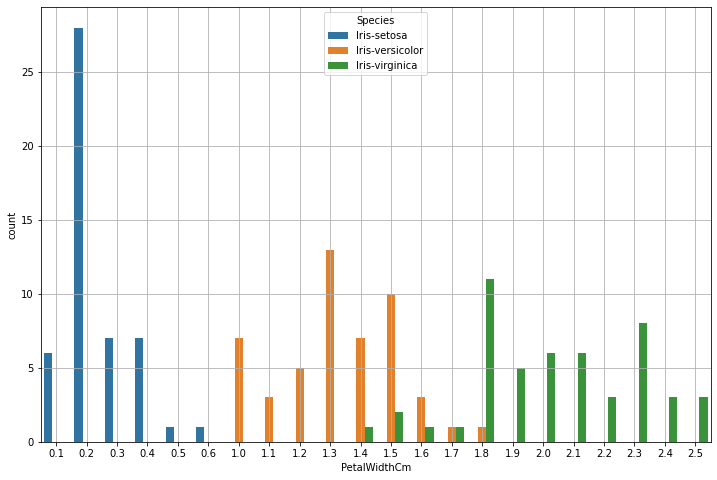

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="PetalWidthCm",hue="Species")
plt.grid(True)

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [22]:
y.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2},inplace=True)

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
ypred = logreg.predict(xtest)

In [39]:
accuracy_score(ytest,ypred)

0.9473684210526315